In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()

print(type(iris))

print(iris.keys())

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
X = iris.data
y = iris.target

print("X shape:",X.shape)
print("Y shape:",y.shape)
print("First 5 labels:", y[:5])
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)

X shape: (150, 4)
Y shape: (150,)
First 5 labels: [0 0 0 0 0]
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y, random_state = 0
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (112, 4)
X_test shape: (38, 4)
y_train shape: (112,)
y_test shape: (38,)


In [7]:
import pandas as pd

try:
    import mglearn
    print("mglearn imported ok")
except ImportError:
    print("mglearn not installed, installing...")
    %pip install mglearn
    import mglearn
    print("mglearn imported ok and imported")

mglearn imported ok


你应该看到一个 5 行 × 4 列左右的表格：

列名是四个特征（sepal length/width, petal length/width）

每行是一朵花的测量值（只用训练集的 112 条里的前 5 条）

In [8]:
iris_dataframe = pd.DataFrame(X_train, columns=iris.feature_names)
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


scatter_matrix：
行、列都是特征名；
每个子图是一对特征的散点；对角线是直方图。
c=y_train：用类别标签给点上色（0/1/2 → 三种颜色）；
cmap=mglearn.cm3：用 mglearn 提供的配色；
alpha=0.8 等只是控制点的透明度、大小，美观用。

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

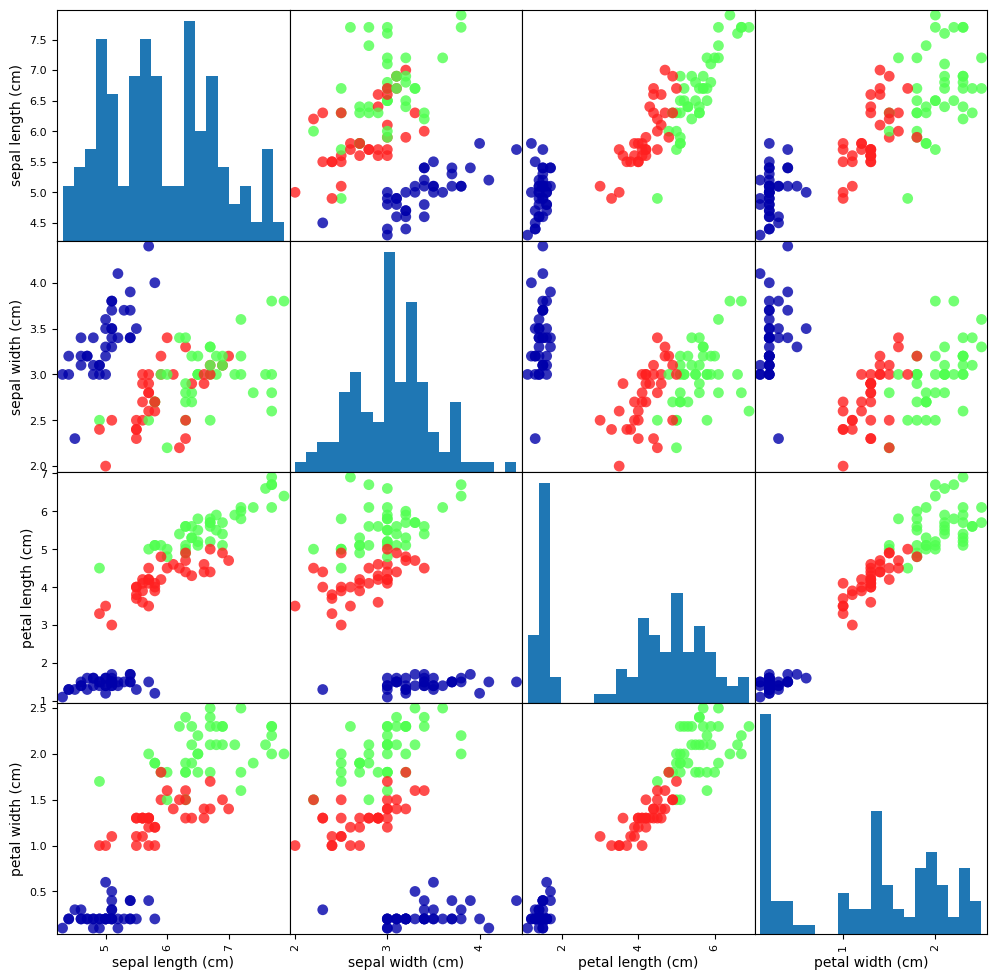

In [9]:
pd.plotting.scatter_matrix(
    iris_dataframe,
    c=y_train,
    figsize=(12, 12),
    marker='o',
    hist_kwds={'bins': 20},
    s=60,
    alpha=0.8,
    cmap=mglearn.cm3
)

# 导入knn模型

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

In [11]:
knn.fit(X_train, y_train)

X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new shape:", X_new.shape)

X_new shape: (1, 4)


In [12]:
prediction = knn.predict(X_new)
print("Prediction:", prediction)
print("Predicted target name:", iris.target_names[prediction])

Prediction: [0]
Predicted target name: ['setosa']
